In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;
from sklearn import preprocessing
import math
from sklearn.metrics import mean_squared_error


## Logistic -- linear model

### Train the model

In [122]:
train = pd.read_csv("train.csv")

In [123]:
train["area"] = train["slotheight"]*train["slotwidth"] 

feature = ["weekday","hour","advertiser","adexchange","area","slotvisibility","slotformat",
          "slotprice"]
X_train = train[feature]
Y_train = train["click"]
X_train.head()

,weekday,hour,advertiser,adexchange,area,slotvisibility,slotformat,slotprice
0,1,14,1458,2,28080,1,0,5
1,2,20,3476,2,62500,1,0,5
2,5,9,1458,1,94080,0,1,0
3,2,20,3427,2,65520,0,0,162
4,6,9,3476,1,85500,0,1,0


In [124]:
X_train.loc[ X_train['slotprice'] <= 0, 'slotprice'] = 0
X_train.loc[(X_train['slotprice'] > 0) & (X_train['slotprice'] <= 10), 'slotprice'] = 1
X_train.loc[(X_train['slotprice'] > 10) & (X_train['slotprice'] <= 50), 'slotprice'] = 2
X_train.loc[(X_train['slotprice'] > 50) & (X_train['slotprice'] <= 100), 'slotprice'] = 3
X_train.loc[(X_train['slotprice'] > 100), 'slotprice'] = 4


C:\Users\rock\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [125]:
X_train.area.value_counts().sort_index()
X_train.loc[ X_train['area'] <= 20000, 'area'] = 0
X_train.loc[(X_train['area'] > 20000) & (X_train['area'] <=40000 ), 'area'] = 1
X_train.loc[(X_train['area'] > 40000) & (X_train['area'] <= 60000), 'area'] = 2
X_train.loc[(X_train['area'] > 60000) & (X_train['area'] <= 80000), 'area'] = 3
X_train.loc[(X_train['area'] > 80000) & (X_train['area'] <= 100000), 'area'] = 4
X_train.loc[(X_train['area'] > 100000), 'area'] = 5


C:\Users\rock\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [126]:
X_train.head()

,weekday,hour,advertiser,adexchange,area,slotvisibility,slotformat,slotprice
0,1,14,1458,2,1,1,0,1
1,2,20,3476,2,3,1,0,1
2,5,9,1458,1,4,0,1,0
3,2,20,3427,2,3,0,0,4
4,6,9,3476,1,4,0,1,0


In [127]:
X_train["advertiser"]=X_train.advertiser.astype("str")
X_train["weekday"]=X_train.weekday.astype("str")
X_train["adexchange"]=X_train.adexchange.astype("str")
X_train["slotvisibility"]=X_train.slotvisibility.astype("str")
X_train["slotformat"]=X_train.slotformat.astype("str")
X_train["hour"]=X_train.hour.astype("str")


X_train=pd.get_dummies(X_train)

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [128]:
logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001)
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

99.920000000000002

In [129]:
Y_pred = logreg.predict_proba(X_train)
Y_pred_log = Y_pred[:,1]
Y_pred_log

array([ 0.00079713,  0.00066784,  0.00086262, ...,  0.00034722,
        0.00071372,  0.00091048])

In [130]:
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_pred_log ,Y_train)
RMSE = math.sqrt(MSE)
print("RMSE: " + str(RMSE) )

RMSE: 0.027433793818018283


### Evaluation Matrix --Logistic
#### base bid = 100

In [131]:
train["pCTR_log"] = Y_pred_log

avgCTR = Y_pred_log.mean()

param_log= Y_pred_log/avgCTR

basebid = train.bidprice.mean()
# budget = 25000
train['new_bidprice_log'] = 100*param_log

statistic=pd.DataFrame()
new_train = train[train["new_bidprice_log"]>=train.payprice]
new_train["total_cost"] = new_train["payprice"].cumsum()
new_train = new_train[new_train["total_cost"]/1000<=25000]
statistic["Click"] = [new_train[new_train.click==1].click.sum()]
statistic["Spend"] = new_train.payprice.sum()/1000
statistic["CTR%"] = statistic["Click"]/new_train.shape[0]
statistic["CPC"] = statistic["Spend"]/statistic["Click"]

statistic_2=pd.DataFrame()
budget_2 = new_train[new_train["total_cost"]/1000<=25000*1/2]
statistic_2["Click"] = [budget_2[budget_2.click==1].click.sum()]
statistic_2["Spend"] = budget_2.payprice.sum()/1000
statistic_2["CTR%"] = statistic_2["Click"]/budget_2.shape[0]
statistic_2["CPC"] = statistic_2["Spend"]/statistic_2["Click"]

statistic_4=pd.DataFrame()
budget_4 = new_train[new_train["total_cost"]/1000<=25000/4]
statistic_4["Click"] = [budget_4[budget_4.click==1].click.sum()]
statistic_4["Spend"] = budget_4.payprice.sum()/1000
statistic_4["CTR%"] = statistic_4["Click"]/budget_4.shape[0]
statistic_4["CPC"] = statistic_4["Spend"]/statistic_4["Click"]

statistic_8=pd.DataFrame()
budget_8 = new_train[new_train["total_cost"]/1000<=25000*1/8]
statistic_8["Click"] = [budget_8[budget_8.click==1].click.sum()]
statistic_8["Spend"] = budget_8.payprice.sum()/1000
statistic_8["CTR%"] = statistic_8["Click"]/budget_8.shape[0]
statistic_8["CPC"] = statistic_8["Spend"]/statistic_8["Click"]

statistic_16=pd.DataFrame()
budget_16 = new_train[new_train["total_cost"]/1000<=25000*1/16]
statistic_16["Click"] = [budget_16[budget_16.click==1].click.sum()]
statistic_16["Spend"] = budget_16.payprice.sum()/1000
statistic_16["CTR%"] = statistic_16["Click"]/budget_16.shape[0]
statistic_16["CPC"] = statistic_16["Spend"]/statistic_16["Click"]


statistic_one = statistic.append(statistic_2)
statistic_two = statistic_one.append(statistic_4)
statistic_3 = statistic_two.append(statistic_8)
statistic_full = statistic_3.append(statistic_16)

statistic_full.index = ["full","1/2","1/4","1/8","1/16"]
statistic_full

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Click,Spend,CTR%,CPC
full,384,24999.977,0.000763,65.104107
1/2,189,12499.950,0.000751,66.137302
1/4,95,6249.979,0.000755,65.789253
1/8,51,3124.990,0.000808,61.274314
1/16,23,1562.475,0.000729,67.933696


In [132]:
train.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,area,pCTR_log,new_bidprice_log
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063",28080,0.000797,105.525350
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111",62500,0.000668,88.409430
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063,94080,0.000863,114.194455
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111",65520,0.000928,122.893224
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005...",85500,0.000426,56.451560


### Validation

In [133]:
validation = pd.read_csv("validation.csv")

In [134]:
validation["area"] = validation["slotheight"]*validation["slotwidth"] 

feature = ["weekday","hour","advertiser","adexchange","area","slotvisibility","slotformat",
          "slotprice"]
X_validation = validation[feature]
Y_validation = validation["click"]
X_validation.head()

,weekday,hour,advertiser,adexchange,area,slotvisibility,slotformat,slotprice
0,5,14,3427,1,75000,0,1,0
1,3,14,2997,null,16000,FirstView,Na,118
2,1,13,3427,3,90000,0,0,70
3,5,18,3427,3,90000,0,0,70
4,5,14,3386,2,94080,2,0,5


In [135]:
X_validation.loc[ X_validation['slotprice'] <= 0, 'slotprice'] = 0
X_validation.loc[(X_validation['slotprice'] > 0) & (X_validation['slotprice'] <= 10), 'slotprice'] = 1
X_validation.loc[(X_validation['slotprice'] > 10) & (X_validation['slotprice'] <= 50), 'slotprice'] = 2
X_validation.loc[(X_validation['slotprice'] > 50) & (X_validation['slotprice'] <= 100), 'slotprice'] = 3
X_validation.loc[(X_validation['slotprice'] > 100), 'slotprice'] = 4

X_validation.area.value_counts().sort_index()
X_validation.loc[ X_validation['area'] <= 20000, 'area'] = 0
X_validation.loc[(X_validation['area'] > 20000) & (X_validation['area'] <=40000 ), 'area'] = 1
X_validation.loc[(X_validation['area'] > 40000) & (X_validation['area'] <= 60000), 'area'] = 2
X_validation.loc[(X_validation['area'] > 60000) & (X_validation['area'] <= 80000), 'area'] = 3
X_validation.loc[(X_validation['area'] > 80000) & (X_validation['area'] <= 100000), 'area'] = 4
X_validation.loc[(X_validation['area'] > 100000), 'area'] = 5


C:\Users\rock\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [136]:
X_validation["advertiser"]=X_validation.advertiser.astype("str")
X_validation["weekday"]=X_validation.weekday.astype("str")
X_validation["adexchange"]=X_validation.adexchange.astype("str")
X_validation["slotvisibility"]=X_validation.slotvisibility.astype("str")
X_validation["slotformat"]=X_validation.slotformat.astype("str")
X_validation["hour"]=X_validation.hour.astype("str")

# X_validation["slotprice"]=X_validation.slotprice.astype("str")
# X_validation["area"]=X_validation.area.astype("str")

X_validation=pd.get_dummies(X_validation)

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [137]:
Y_pred_validation = logreg.predict_proba(X_validation)
Y_pred_validation_log = Y_pred_validation[:,1]
Y_pred_validation_log

array([ 0.00063285,  0.00572677,  0.0008557 , ...,  0.00035328,
        0.00025479,  0.00114611])

In [138]:
MSE = mean_squared_error(Y_pred_validation_log,Y_validation)
RMSE = math.sqrt(MSE)
print("RMSE: " + str(RMSE) )

RMSE: 0.027433630306692516


In [139]:
validation["pCTR_log"] = Y_pred_validation_log

# avgCTR = (train[train.click==1].groupby("advertiser").size().values/train.groupby("advertiser").size().values).mean()
avgCTR = Y_pred_validation_log.mean()

param_validation_log= Y_pred_validation_log/avgCTR
param_validation_log

array([ 0.84192958,  7.61875047,  1.13839622, ...,  0.47000023,
        0.33896518,  1.52475801])

### Performance matrix
#### base bid = 100

In [140]:
basebid = train.bidprice.mean()
# budget = 25000
validation['new_bidprice_log'] = 100*param_validation_log

statistic=pd.DataFrame()
new_validation = validation[validation["new_bidprice_log"]>=validation.payprice]
new_validation["total_cost"] = new_validation["payprice"].cumsum()
new_validation = new_validation[new_validation["total_cost"]/1000<=25000]
statistic["Click"] = [new_validation[new_validation.click==1].click.sum()]
statistic["Spend"] = new_validation.payprice.sum()/1000
statistic["CTR%"] = statistic["Click"]/new_validation.shape[0]
statistic["CPC"] = statistic["Spend"]/statistic["Click"]

statistic_4=pd.DataFrame()
budget_4 = new_validation[new_validation["total_cost"]/1000<=25000*1/4]
statistic_4["Click"] = [budget_4[budget_4.click==1].click.sum()]
statistic_4["Spend"] = budget_4.payprice.sum()/1000
statistic_4["CTR%"] = statistic_4["Click"]/budget_4.shape[0]
statistic_4["CPC"] = statistic_4["Spend"]/statistic_4["Click"]

statistic_2=pd.DataFrame()
budget_2 = new_validation[new_validation["total_cost"]/1000<=25000*1/2]
statistic_2["Click"] = [budget_2[budget_2.click==1].click.sum()]
statistic_2["Spend"] = budget_2.payprice.sum()/1000
statistic_2["CTR%"] = statistic_2["Click"]/budget_2.shape[0]
statistic_2["CPC"] = statistic_2["Spend"]/statistic_2["Click"]

statistic_16=pd.DataFrame()
budget_16 = new_validation[new_validation["total_cost"]/1000<=25000*1/16]
statistic_16["Click"] = [budget_16[budget_16.click==1].click.sum()]
statistic_16["Spend"] = budget_16.payprice.sum()/1000
statistic_16["CTR%"] = statistic_16["Click"]/budget_16.shape[0]
statistic_16["CPC"] = statistic_16["Spend"]/statistic_16["Click"]

statistic_8=pd.DataFrame()
budget_8 = new_validation[new_validation["total_cost"]/1000<=25000*1/8]
statistic_8["Click"] = [budget_8[budget_8.click==1].click.sum()]
statistic_8["Spend"] = budget_8.payprice.sum()/1000
statistic_8["CTR%"] = statistic_8["Click"]/budget_8.shape[0]
statistic_8["CPC"] = statistic_8["Spend"]/statistic_8["Click"]

statistic_one = statistic.append(statistic_2)
statistic_two = statistic_one.append(statistic_4)
statistic_3 = statistic_two.append(statistic_8)
statistic_full = statistic_3.append(statistic_16)

statistic_full.index = ["full","1/2","1/4","1/8","1/16"]
statistic_full

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Click,Spend,CTR%,CPC
full,138,9735.674,0.000707,70.548362
1/2,138,9735.674,0.000707,70.548362
1/4,89,6249.985,0.000709,70.224551
1/8,54,3124.967,0.000861,57.869759
1/16,30,1562.456,0.000957,52.081867


#### base bid = 272

In [141]:
validation['new_bidprice_log'] = 272*param_validation_log

statistic=pd.DataFrame()
new_validation = validation[validation["new_bidprice_log"]>=validation.payprice]
new_validation["total_cost"] = new_validation["payprice"].cumsum()
new_validation = new_validation[new_validation["total_cost"]/1000<=25000]
statistic["Click"] = [new_validation[new_validation.click==1].click.sum()]
statistic["Spend"] = new_validation.payprice.sum()/1000
statistic["CTR%"] = statistic["Click"]/new_validation.shape[0]
statistic["CPC"] = statistic["Spend"]/statistic["Click"]

statistic_4=pd.DataFrame()
budget_4 = new_validation[new_validation["total_cost"]/1000<=25000*1/4]
statistic_4["Click"] = [budget_4[budget_4.click==1].click.sum()]
statistic_4["Spend"] = budget_4.payprice.sum()/1000
statistic_4["CTR%"] = statistic_4["Click"]/budget_4.shape[0]
statistic_4["CPC"] = statistic_4["Spend"]/statistic_4["Click"]

statistic_2=pd.DataFrame()
budget_2 = new_validation[new_validation["total_cost"]/1000<=25000*1/2]
statistic_2["Click"] = [budget_2[budget_2.click==1].click.sum()]
statistic_2["Spend"] = budget_2.payprice.sum()/1000
statistic_2["CTR%"] = statistic_2["Click"]/budget_2.shape[0]
statistic_2["CPC"] = statistic_2["Spend"]/statistic_2["Click"]

statistic_16=pd.DataFrame()
budget_16 = new_validation[new_validation["total_cost"]/1000<=25000*1/16]
statistic_16["Click"] = [budget_16[budget_16.click==1].click.sum()]
statistic_16["Spend"] = budget_16.payprice.sum()/1000
statistic_16["CTR%"] = statistic_16["Click"]/budget_16.shape[0]
statistic_16["CPC"] = statistic_16["Spend"]/statistic_16["Click"]

statistic_8=pd.DataFrame()
budget_8 = new_validation[new_validation["total_cost"]/1000<=25000*1/8]
statistic_8["Click"] = [budget_8[budget_8.click==1].click.sum()]
statistic_8["Spend"] = budget_8.payprice.sum()/1000
statistic_8["CTR%"] = statistic_8["Click"]/budget_8.shape[0]
statistic_8["CPC"] = statistic_8["Spend"]/statistic_8["Click"]

statistic_one = statistic.append(statistic_2)
statistic_two = statistic_one.append(statistic_4)
statistic_3 = statistic_two.append(statistic_8)
statistic_full = statistic_3.append(statistic_16)

statistic_full.index = ["full","1/2","1/4","1/8","1/16"]
statistic_full

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Click,Spend,CTR%,CPC
full,210,19192.627,0.000767,91.393462
1/2,134,12499.955,0.000751,93.283246
1/4,81,6249.987,0.000908,77.160333
1/8,46,3124.988,0.001032,67.934522
1/16,24,1562.493,0.001082,65.103875


In [142]:
validation.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,area,pCTR_log,new_bidprice_log
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111",75000,0.000633,229.004846
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,118,11908,277,118,null,2997,null,16000,0.005727,2072.300129
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null,90000,0.000856,309.643773
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null,90000,0.000970,350.846358
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null,94080,0.000352,127.211864


## Gradient

In [143]:
train["area"] = train["slotheight"]*train["slotwidth"] 

city = pd.DataFrame(train.city.value_counts()/train.shape[0]).index
frequent = pd.DataFrame(train.city.value_counts()/train.shape[0]).values
r = pd.DataFrame()
r["city"] = city
r["frequent"] = frequent
train=pd.merge(train,r,on='city',how='left') 

feature = ["weekday","hour","advertiser","adexchange","area","slotvisibility","slotformat","frequent",
          "slotprice"]
X_train = train[feature]
Y_train = train["click"]

X_train.head()

,weekday,hour,advertiser,adexchange,area,slotvisibility,slotformat,frequent,slotprice
0,1,14,1458,2,28080,1,0,0.019417,5
1,2,20,3476,2,62500,1,0,0.013130,5
2,5,9,1458,1,94080,0,1,0.039022,0
3,2,20,3427,2,65520,0,0,0.004477,162
4,6,9,3476,1,85500,0,1,0.001714,0


In [144]:
np.random.seed(12)

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

X_train["slotvisibility"] = label_encoder.fit_transform(X_train["slotvisibility"])
X_train["slotformat"] = label_encoder.fit_transform(X_train["slotformat"])
X_train["adexchange"] = label_encoder.fit_transform(X_train["adexchange"])

X_train["advertiser"]=X_train.advertiser.astype("str")
X_train["weekday"]=X_train.weekday.astype("str")
X_train["hour"]=X_train.hour.astype("str")

X_train=pd.get_dummies(X_train)

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [145]:
import xgboost as xgb
#model_xgb = xgb.XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.5)
model_xgb = xgb.XGBClassifier(n_estimators=300) #117
model_xgb.fit(X_train,Y_train)


#GBR = GradientBoostingClassifier()
#GBR.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [146]:
XGB_prediction2D=model_xgb.predict_proba(X_train)

#Y_pred_ = GBR.predict_proba(X_train)
Y_pred_gbr = XGB_prediction2D[:,1]
Y_pred_gbr

array([ 0.00086655,  0.00030427,  0.00111079, ...,  0.00025365,
        0.00039957,  0.00078972], dtype=float32)

In [147]:
MSE = mean_squared_error(Y_pred_gbr,Y_train)
RMSE = math.sqrt(MSE)
print("RMSE: " + str(RMSE) )

RMSE: 0.027418830785208386


### Performance Matrix --- Train
#### Base bid = 100

In [148]:
train["pCTR_gbr"] = Y_pred_gbr

avgCTR = Y_pred_gbr.mean()

param_gbr= Y_pred_gbr/avgCTR

train['new_bidprice_gbr'] = 100*param_gbr

statistic=pd.DataFrame()
new_train = train[train["new_bidprice_gbr"]>=train.payprice]
new_train["total_cost"] = new_train["payprice"].cumsum()
new_train = new_train[new_train["total_cost"]/1000<=25000]
statistic["Click"] = [new_train[new_train.click==1].click.sum()]
statistic["Spend"] = new_train.payprice.sum()/1000
statistic["CTR%"] = statistic["Click"]/new_train.shape[0]
statistic["CPC"] = statistic["Spend"]/statistic["Click"]

statistic_4=pd.DataFrame()
budget_4 = new_train[new_train["total_cost"]/1000<=25000*1/4]
statistic_4["Click"] = [budget_4[budget_4.click==1].click.sum()]
statistic_4["Spend"] = budget_4.payprice.sum()/1000
statistic_4["CTR%"] = statistic_4["Click"]/budget_4.shape[0]
statistic_4["CPC"] = statistic_4["Spend"]/statistic_4["Click"]

statistic_2=pd.DataFrame()
budget_2 = new_train[new_train["total_cost"]/1000<=25000*1/2]
statistic_2["Click"] = [budget_2[budget_2.click==1].click.sum()]
statistic_2["Spend"] = budget_2.payprice.sum()/1000
statistic_2["CTR%"] = statistic_2["Click"]/budget_2.shape[0]
statistic_2["CPC"] = statistic_2["Spend"]/statistic_2["Click"]

statistic_16=pd.DataFrame()
budget_16 = new_train[new_train["total_cost"]/1000<=25000*1/16]
statistic_16["Click"] = [budget_16[budget_16.click==1].click.sum()]
statistic_16["Spend"] = budget_16.payprice.sum()/1000
statistic_16["CTR%"] = statistic_16["Click"]/budget_16.shape[0]
statistic_16["CPC"] = statistic_16["Spend"]/statistic_16["Click"]

statistic_8=pd.DataFrame()
budget_8 = new_train[new_train["total_cost"]/1000<=25000*1/8]
statistic_8["Click"] = [budget_8[budget_8.click==1].click.sum()]
statistic_8["Spend"] = budget_8.payprice.sum()/1000
statistic_8["CTR%"] = statistic_8["Click"]/budget_8.shape[0]
statistic_8["CPC"] = statistic_8["Spend"]/statistic_8["Click"]

statistic_one = statistic.append(statistic_2)
statistic_two = statistic_one.append(statistic_4)
statistic_3 = statistic_two.append(statistic_8)
statistic_full = statistic_3.append(statistic_16)

statistic_full.index = ["full","1/2","1/4","1/8","1/16"]
statistic_full

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Click,Spend,CTR%,CPC
full,445,24999.965,0.000912,56.179697
1/2,218,12499.957,0.000893,57.339252
1/4,100,6249.973,0.000818,62.499730
1/8,55,3124.995,0.000899,56.818091
1/16,24,1562.436,0.000786,65.101500


### Validation

In [149]:
validation["area"] = validation["slotheight"]*validation["slotwidth"] 

city = pd.DataFrame(validation.city.value_counts()/validation.shape[0]).index
frequent = pd.DataFrame(validation.city.value_counts()/validation.shape[0]).values
r = pd.DataFrame()
r["city"] = city
r["frequent"] = frequent
validation=pd.merge(validation,r,on='city',how='left') 

feature = ["weekday","hour","advertiser","adexchange","area","slotvisibility","slotformat","frequent",
          "slotprice"]
X_validation = validation[feature]
Y_validation = validation["click"]

X_validation.head()

,weekday,hour,advertiser,adexchange,area,slotvisibility,slotformat,frequent,slotprice
0,5,14,3427,1,75000,0,1,0.002068,0
1,3,14,2997,null,16000,FirstView,Na,0.039229,118
2,1,13,3427,3,90000,0,0,0.003676,70
3,5,18,3427,3,90000,0,0,0.010175,70
4,5,14,3386,2,94080,2,0,0.021628,5


In [150]:
np.random.seed(12)

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

X_validation["slotvisibility"] = label_encoder.fit_transform(X_validation["slotvisibility"])
X_validation["slotformat"] = label_encoder.fit_transform(X_validation["slotformat"])
X_validation["adexchange"] = label_encoder.fit_transform(X_validation["adexchange"])


X_validation["advertiser"]=X_validation.advertiser.astype("str")
X_validation["weekday"]=X_validation.weekday.astype("str")
X_validation["hour"]=X_validation.hour.astype("str")

X_validation=pd.get_dummies(X_validation)

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [151]:
#Y_pred_validation_gbr = GBR.predict_proba(X_validation)
#Y_pred_validation_gbr = Y_pred_validation_gbr [:,1]

XGB_prediction2D=model_xgb.predict_proba(X_validation)

#Y_pred_ = GBR.predict_proba(X_train)
Y_pred_validation_gbr = XGB_prediction2D[:,1]

MSE = mean_squared_error(Y_pred_validation_gbr,Y_validation)
RMSE = math.sqrt(MSE)
print("RMSE: " + str(RMSE) )

RMSE: 0.02742863197982376


### Performace Matrix--validaiton
#### Base bid = 100

In [152]:
validation["pCTR_gbr"] = Y_pred_validation_gbr

avgCTR = Y_pred_validation_gbr.mean()

param_validation_gbr= Y_pred_validation_gbr/avgCTR

validation['new_bidprice_gbr'] = 100*param_validation_gbr

statistic=pd.DataFrame()
new_validation = validation[validation["new_bidprice_gbr"]>=validation.payprice]
new_validation["total_cost"] = new_validation["payprice"].cumsum()
new_validation = new_validation[new_validation["total_cost"]/1000<=25000]
statistic["Click"] = [new_validation[new_validation.click==1].click.sum()]
statistic["Spend"] = new_validation.payprice.sum()/1000
statistic["CTR%"] = statistic["Click"]/new_validation.shape[0]
statistic["CPC"] = statistic["Spend"]/statistic["Click"]

statistic_4=pd.DataFrame()
budget_4 = new_validation[new_validation["total_cost"]/1000<=25000*1/4]
statistic_4["Click"] = [budget_4[budget_4.click==1].click.sum()]
statistic_4["Spend"] = budget_4.payprice.sum()/1000
statistic_4["CTR%"] = statistic_4["Click"]/budget_4.shape[0]
statistic_4["CPC"] = statistic_4["Spend"]/statistic_4["Click"]

statistic_2=pd.DataFrame()
budget_2 = new_validation[new_validation["total_cost"]/1000<=25000*1/2]
statistic_2["Click"] = [budget_2[budget_2.click==1].click.sum()]
statistic_2["Spend"] = budget_2.payprice.sum()/1000
statistic_2["CTR%"] = statistic_2["Click"]/budget_2.shape[0]
statistic_2["CPC"] = statistic_2["Spend"]/statistic_2["Click"]

statistic_16=pd.DataFrame()
budget_16 = new_validation[new_validation["total_cost"]/1000<=25000*1/16]
statistic_16["Click"] = [budget_16[budget_16.click==1].click.sum()]
statistic_16["Spend"] = budget_16.payprice.sum()/1000
statistic_16["CTR%"] = statistic_16["Click"]/budget_16.shape[0]
statistic_16["CPC"] = statistic_16["Spend"]/statistic_16["Click"]

statistic_8=pd.DataFrame()
budget_8 = new_validation[new_validation["total_cost"]/1000<=25000*1/8]
statistic_8["Click"] = [budget_8[budget_8.click==1].click.sum()]
statistic_8["Spend"] = budget_8.payprice.sum()/1000
statistic_8["CTR%"] = statistic_8["Click"]/budget_8.shape[0]
statistic_8["CPC"] = statistic_8["Spend"]/statistic_8["Click"]

statistic_one = statistic.append(statistic_2)
statistic_two = statistic_one.append(statistic_4)
statistic_3 = statistic_two.append(statistic_8)
statistic_full = statistic_3.append(statistic_16)

statistic_full.index = ["full","1/2","1/4","1/8","1/16"]
statistic_full

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Click,Spend,CTR%,CPC
full,152,9489.057,0.000822,62.428007
1/2,152,9489.057,0.000822,62.428007
1/4,101,6249.952,0.000827,61.880713
1/8,61,3124.913,0.000998,51.228082
1/16,33,1562.486,0.001083,47.348061


#### base price = 272

In [154]:
#validation['new_bidprice_gbr']=param_validation_gbr
validation['new_bidprice_gbr']=70*param_validation_gbr   #1/4 116 #A
#validation['new_bidprice_gbr'] = 70*(np.sqrt(validation['new_bidprice_gbr']))*10   #B
#validation['new_bidprice_gbr'] = 70*(param_validation_gbr**2) #C
#validation['new_bidprice_gbr'] = 70*(param_validation_gbr**3) #D
#validation['new_bidprice_gbr'] = 80*(param_validation_gbr) #validation['new_bidprice_gbr']
#validation['new_bidprice_gbr'] = 70*(np.log(validation['new_bidprice_gbr']))*10  #E
#validation['new_bidprice_gbr'] = 99800000*(((validation['new_bidprice_gbr']/q)**2)/(((validation['new_bidprice_gbr']/q)**2)+25))#
#F
#validation['new_bidprice_gbr']=70*(param_validation_gbr+   (np.log10(validation['new_bidprice_gbr']))**2     )

statistic=pd.DataFrame()
new_validation = validation[validation["new_bidprice_gbr"]>=validation.payprice]
new_validation["total_cost"] = new_validation["payprice"].cumsum()
budget_1 = new_validation[new_validation["total_cost"]/1000<=25000]
statistic["Click"] = [budget_1[budget_1.click==1].click.sum()]
statistic["Spend"] = budget_1.payprice.sum()/1000
statistic["CTR%"] = statistic["Click"]/budget_1.shape[0]*100
statistic["CPC"] = statistic["Spend"]/statistic["Click"]
statistic["CPM"] = statistic["Spend"] /budget_1.shape[0]* 1000

statistic_2=pd.DataFrame()
budget_2 = new_validation[new_validation["total_cost"]/1000<=25000*1/2]
statistic_2["Click"] = [budget_2[budget_2.click==1].click.sum()]
statistic_2["Spend"] = budget_2.payprice.sum()/1000
statistic_2["CTR%"] = statistic_2["Click"]/budget_2.shape[0]*100
statistic_2["CPC"] = statistic_2["Spend"]/statistic_2["Click"]
statistic_2["CPM"] = statistic_2["Spend"] /budget_2.shape[0]* 1000

statistic_4=pd.DataFrame()
budget_4 = new_validation[new_validation["total_cost"]/1000<=25000/4]
statistic_4["Click"] = [budget_4[budget_4.click==1].click.sum()]
statistic_4["Spend"] = budget_4.payprice.sum()/1000
statistic_4["CTR%"] = statistic_4["Click"]/budget_4.shape[0]*100
statistic_4["CPC"] = statistic_4["Spend"]/statistic_4["Click"]
statistic_4["CPM"] = statistic_4["Spend"] /budget_4.shape[0]* 1000

statistic_8=pd.DataFrame()
budget_8 = new_validation[new_validation["total_cost"]/1000<=25000*1/8]
statistic_8["Click"] = [budget_8[budget_8.click==1].click.sum()]
statistic_8["Spend"] = budget_8.payprice.sum()/1000
statistic_8["CTR%"] = statistic_8["Click"]/budget_8.shape[0]*100
statistic_8["CPC"] = statistic_8["Spend"]/statistic_8["Click"]
statistic_8["CPM"] = statistic_8["Spend"] /budget_8.shape[0]* 1000

statistic_16=pd.DataFrame()
budget_16 = new_validation[new_validation["total_cost"]/1000<=25000*1/16]
statistic_16["Click"] = [budget_16[budget_16.click==1].click.sum()]
statistic_16["Spend"] = budget_16.payprice.sum()/1000
statistic_16["CTR%"] = statistic_16["Click"]/budget_16.shape[0]*100
statistic_16["CPC"] = statistic_16["Spend"]/statistic_16["Click"]
statistic_16["CPM"] = statistic_16["Spend"] /budget_16.shape[0]* 1000


statistic_one = statistic.append(statistic_2)
statistic_two = statistic_one.append(statistic_4)
statistic_3 = statistic_two.append(statistic_8)
statistic_full = statistic_3.append(statistic_16)

statistic_full.index = ["full","1/2","1/4(6250)","1/8","1/16"]
statistic_full

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Click,Spend,CTR%,CPC,CPM
full,116,6093.271,0.084943,52.528198,44.619081
1/2,116,6093.271,0.084943,52.528198,44.619081
1/4(6250),116,6093.271,0.084943,52.528198,44.619081
1/8,63,3124.961,0.089543,49.602556,44.415780
1/16,36,1562.480,0.102305,43.402222,44.402512


In [35]:
#66 #n_estimators=600, max_depth=9, learning_rate=0.1
#107 #defult
#66 #learning_rate=0.01
#110 #n_estimators=200
#114 #n_estimators=300
#109 #n_estimators=400
#66 #n_estimators=300 learning_rate=0.01
#111 #n_estimators=300, max_depth=5

In [36]:
#117  74

In [37]:
#sss=param_validation_gbr**0.5

In [76]:
statistic_full_A
statistic_full_A

,Click,Spend,CTR%,CPC,CPM
full,116,6093.271,0.084943,52.528198,44.619081
1/2,116,6093.271,0.084943,52.528198,44.619081
1/4(6250),116,6093.271,0.084943,52.528198,44.619081
1/8,63,3124.961,0.089543,49.602556,44.415780
1/16,36,1562.480,0.102305,43.402222,44.402512


In [78]:
statistic_full_B
statistic_full_B

,Click,Spend,CTR%,CPC,CPM
full,226,24045.218,0.075396,106.394770,80.217842
1/2,122,12499.929,0.078306,102.458434,80.230610
1/4(6250),69,6249.912,0.088399,90.578435,80.070617
1/8,42,3124.952,0.108039,74.403619,80.384617
1/16,22,1562.468,0.112797,71.021273,80.110131


In [80]:
statistic_full_C
statistic_full_C

,Click,Spend,CTR%,CPC,CPM
full,117,6738.007,0.098156,57.589803,56.527853
1/2,117,6738.007,0.098156,57.589803,56.527853
1/4(6250),106,6249.933,0.095727,58.961632,56.442487
1/8,55,3124.937,0.099282,56.817036,56.408841
1/16,31,1562.478,0.112156,50.402516,56.529595


In [82]:
statistic_full_D=statistic_full
statistic_full_D

,Click,Spend,CTR%,CPC,CPM
full,123,7500.717,0.109743,60.981439,66.922885
1/2,123,7500.717,0.109743,60.981439,66.922885
1/4(6250),97,6249.964,0.103838,64.432619,66.905358
1/8,56,3124.954,0.119963,55.802750,66.942739
1/16,31,1562.485,0.134002,50.402742,67.540633


In [85]:
statistic_full_E
statistic_full_E

,Click,Spend,CTR%,CPC,CPM
full,221,22931.124,0.077575,103.760742,80.491999
1/2,126,12499.892,0.081119,99.205492,80.474171
1/4(6250),72,6249.815,0.092471,86.802986,80.267846
1/8,43,3124.988,0.110919,72.674140,80.609487
1/16,22,1562.371,0.113466,71.016864,80.580277


In [74]:
statistic_full_F
statistic_full_F

,Click,Spend,CTR%,CPC,CPM
full,226,24045.218,0.075396,106.394770,80.217842
1/2,122,12499.929,0.078306,102.458434,80.230610
1/4(6250),69,6249.912,0.088399,90.578435,80.070617
1/8,42,3124.952,0.108039,74.403619,80.384617
1/16,22,1562.468,0.112797,71.021273,80.110131


In [ ]:
statistic_full

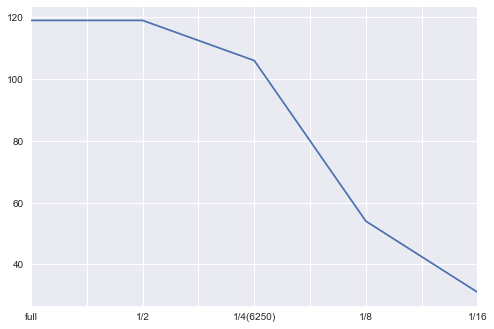

In [196]:
statistic_full.Click.plot()
plt.show()

In [37]:
param_validation_gbr

array([ 1.07423592,  7.19796991,  1.42724574, ...,  0.87616515,
        0.33874011,  1.73519945], dtype=float32)

In [86]:
4**0.5

2.0

In [67]:
import math
full_sss=[116,226,117,123,221,226]
sss1=pd.DataFrame(full_sss)
#sss1.columns=(["name"])
#sss2=np.sqrt(sss1["name"])
#math.sqrt
sss1.columns=(["full"])
sss1.index=(["A","B","C","D","E","F"])
#math.log

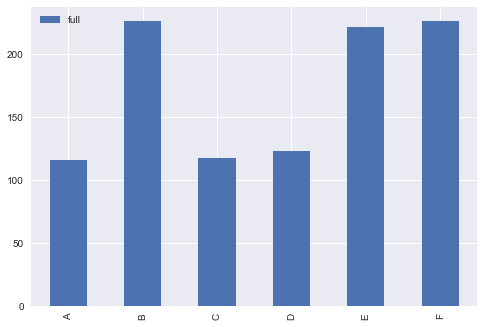

In [68]:
sss1.plot.bar()
#plt.plot(Y_pred_validation_gbr)
plt.show()

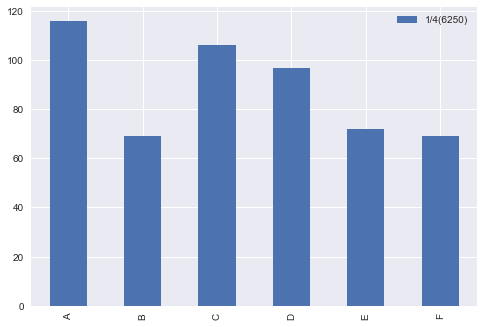

In [69]:
import math
full_sss=[116,69,106,97,72,69]
sss1=pd.DataFrame(full_sss)
sss1.columns=(["1/4(6250)"])
sss1.index=(["A","B","C","D","E","F"])
sss1.plot.bar()
plt.show()

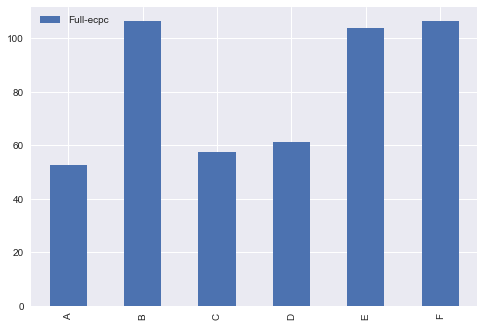

In [70]:
full_sss=[52.528198,106.394770,57.589803,60.981439,103.760742,106.393929]
sss1=pd.DataFrame(full_sss)
sss1.columns=(["Full-ecpc"])
sss1.index=(["A","B","C","D","E","F"])
sss1.plot.bar()
plt.show()

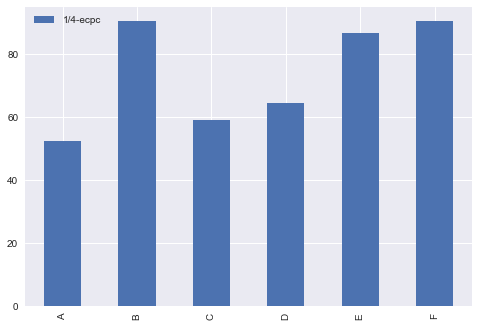

In [71]:
full_sss=[52.528198,90.578435,58.961632,64.432619,86.802986,90.577580]
sss1=pd.DataFrame(full_sss)
sss1.columns=(["1/4-ecpc"])
sss1.index=(["A","B","C","D","E","F"])
sss1.plot.bar()
plt.show()